In [2]:
#importing packages
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# loading the dataset
file_path = 'C:/Users/sneha/OneDrive/Desktop/college/intern/student_cleaned.csv'
student_data = pd.read_csv(file_path)
student_data.head()

,Reg_no,Gender,Tenth_marks,Eleventh_marks,Twelfth_marks,Income,Family_size,Objective,Study_pattern,Time_spent_pattern,Extra_curricular_activity,Paused_resumed
0,st101,Female,90.8,91.1,93.6,Upper middle income,3,"Yes, clear and specific.",4-6 days/week,3-4 hrs,Sports and Physical Activities,Paused and resumed due to academics.
1,st102,Male,88.5,93.0,94.3,Upper middle income,4,Not specific enough.,2-3 days/week,1-2 hrs,Sports and Physical Activities,Completely stopped because of academics.
2,st103,Female,98.8,97.3,97.8,Middle income,4,"Yes, clear and specific.",Everyday,2-3 hrs,Others,Paused and resumed due to academics.
3,st104,Female,90.8,96.0,92.0,High income,6,"Yes, clear and specific.",4-6 days/week,2-3 hrs,Arts and Culture,Paused and resumed due to academics.
4,st105,Male,90.6,91.0,96.0,Upper middle income,5,Not specific enough.,2-3 days/week,1-2 hrs,Sports and Physical Activities,Paused and resumed due to academics.


### Analysing how the objective effect the student performance using Decision Tree

In [40]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder

# Encode the categorical Objective variable
le = LabelEncoder()
X = le.fit_transform(student_data['Objective']).reshape(-1, 1)

# Create decision tree models for Tenth_marks, Eleventh_marks, and Twelfth_marks
models = {
    'Tenth_marks': DecisionTreeRegressor(),
    'Eleventh_marks': DecisionTreeRegressor(),
    'Twelfth_marks': DecisionTreeRegressor()
}

for marks_col in ['Tenth_marks', 'Eleventh_marks', 'Twelfth_marks']:
    y = student_data[marks_col]
    models[marks_col].fit(X, y)
    print(f"Feature importance for {marks_col}: ", models[marks_col].feature_importances_)

Feature importance for Tenth_marks:  [1.]
Feature importance for Eleventh_marks:  [1.]
Feature importance for Twelfth_marks:  [1.]


c:\Users\sneha\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


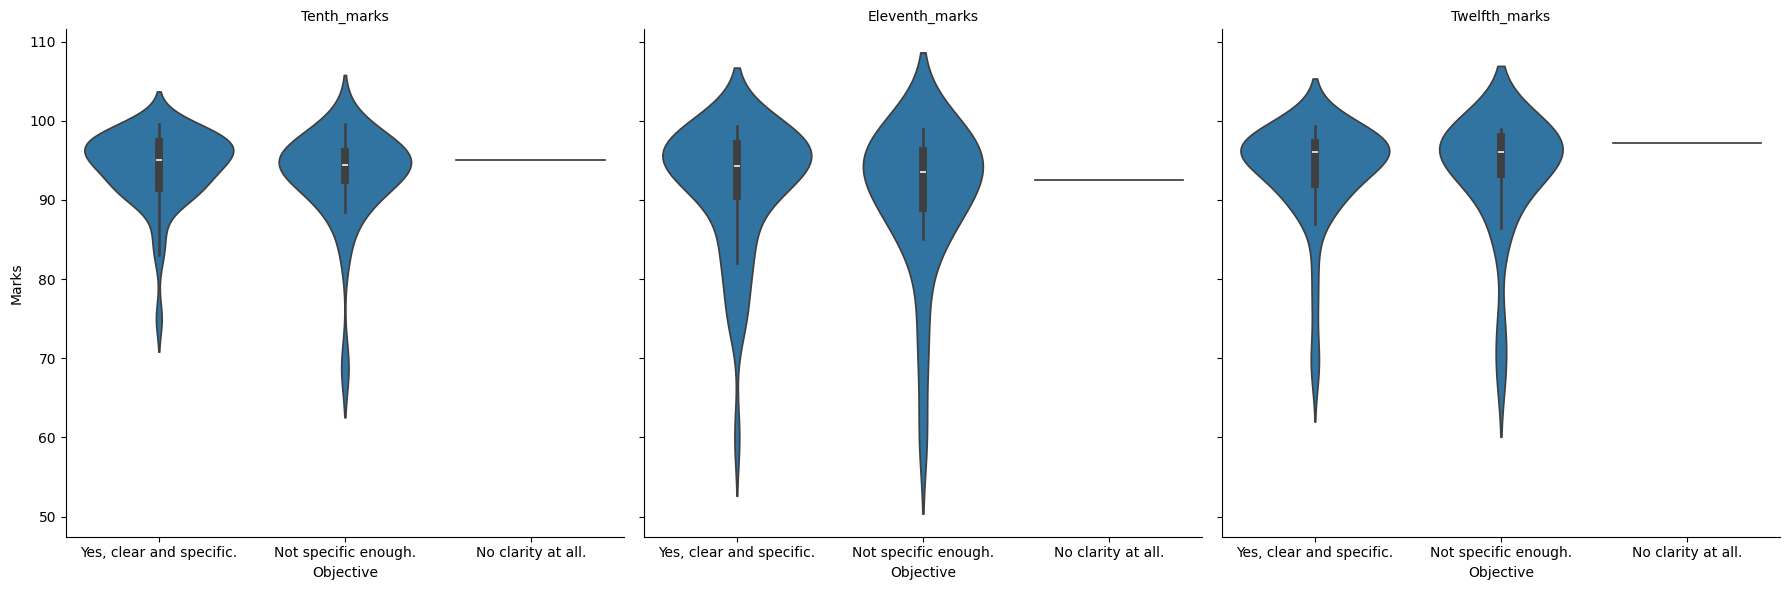

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Melt the data to create a long-form dataset
melted_data = student_data.melt(id_vars='Objective', value_vars=['Tenth_marks', 'Eleventh_marks', 'Twelfth_marks'])

# Create a FacetGrid
g = sns.FacetGrid(melted_data, col="variable", col_order=['Tenth_marks', 'Eleventh_marks', 'Twelfth_marks'], height=6)
g.map(sns.violinplot, "Objective", "value")

# Set titles and labels
g.set_titles("{col_name}")
g.set_axis_labels("Objective", "Marks")

plt.show()

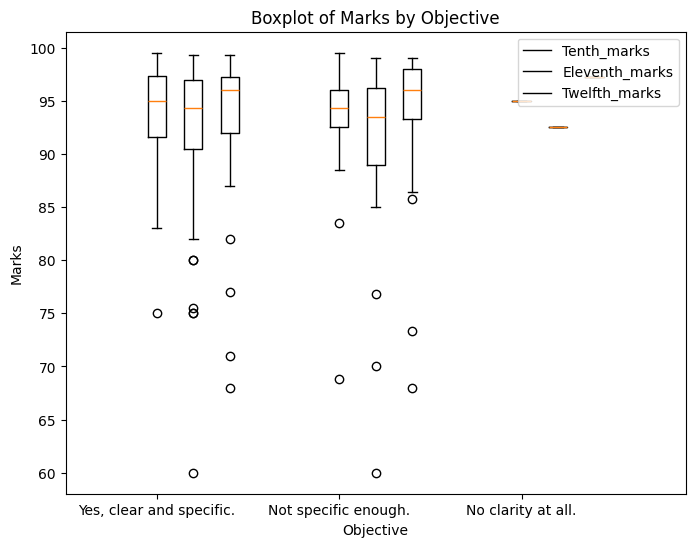

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
for i, objective in enumerate(student_data['Objective'].unique()):
    tenth_marks = student_data[student_data['Objective'] == objective]['Tenth_marks']
    eleventh_marks = student_data[student_data['Objective'] == objective]['Eleventh_marks']
    twelfth_marks = student_data[student_data['Objective'] == objective]['Twelfth_marks']
    plt.boxplot([tenth_marks, eleventh_marks, twelfth_marks], positions=[i, i+0.2, i+0.4], widths=0.1)
plt.xlabel('Objective')
plt.ylabel('Marks')
plt.title('Boxplot of Marks by Objective')
plt.xticks(range(len(student_data['Objective'].unique())), student_data['Objective'].unique())
plt.legend(['Tenth_marks', 'Eleventh_marks', 'Twelfth_marks'], loc='upper right')
plt.show()